In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as spy

%matplotlib inline

In [2]:
sam_data = pd.read_csv("data/sample_submission.csv")
sam_data.describe()

,id,price
count,129050.000000,1.290500e+05
mean,258097.500000,3.969155e+03
std,37253.670457,1.304084e-08
min,193573.000000,3.969155e+03
25%,225835.250000,3.969155e+03
50%,258097.500000,3.969155e+03
75%,290359.750000,3.969155e+03
max,322622.000000,3.969155e+03


In [3]:
sam_data.head()

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155


In [4]:
sam_data.tail()

,id,price
129045,322618,3969.155
129046,322619,3969.155
129047,322620,3969.155
129048,322621,3969.155
129049,322622,3969.155


In [5]:
trainer = pd.read_csv("data/train.csv")
trainer.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [6]:
trainer.tail(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [7]:
trainer.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
trainer.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
unique_value = []

for col in trainer.columns:
    unique_value.append(trainer[col].unique())

unique_value

[array([     0,      1,      2, ..., 193570, 193571, 193572], dtype=int64),
 array([1.52, 2.03, 0.7 , 0.32, 1.7 , 1.51, 0.74, 1.34, 0.3 , 1.01, 0.23,
        0.31, 0.33, 1.06, 0.26, 0.73, 0.39, 0.25, 0.4 , 0.71, 0.5 , 1.11,
        0.37, 0.38, 0.9 , 0.35, 0.41, 0.57, 1.5 , 1.  , 0.42, 1.04, 0.43,
        1.2 , 0.77, 0.52, 0.85, 1.44, 1.22, 0.75, 1.29, 1.02, 2.02, 1.54,
        2.01, 1.48, 0.59, 0.27, 1.61, 1.53, 1.25, 1.07, 2.  , 0.86, 0.55,
        0.97, 0.72, 1.21, 1.05, 0.91, 2.22, 1.27, 1.33, 1.08, 0.28, 0.56,
        0.58, 1.28, 1.36, 1.13, 2.1 , 0.34, 0.82, 2.32, 2.24, 1.67, 1.16,
        1.31, 2.18, 0.76, 1.19, 1.56, 1.74, 2.43, 1.09, 0.51, 0.95, 2.2 ,
        0.36, 0.68, 1.1 , 1.3 , 2.25, 2.04, 0.29, 0.94, 1.4 , 1.03, 1.26,
        1.65, 0.54, 1.12, 0.24, 1.17, 1.14, 0.61, 1.32, 1.82, 1.55, 1.24,
        0.96, 0.8 , 0.65, 2.14, 0.6 , 1.59, 1.18, 0.84, 0.79, 0.92, 0.53,
        2.05, 1.23, 1.6 , 0.46, 2.06, 0.62, 0.78, 0.83, 0.44, 2.08, 1.71,
        0.81, 2.09, 1.35, 1.73, 0.49

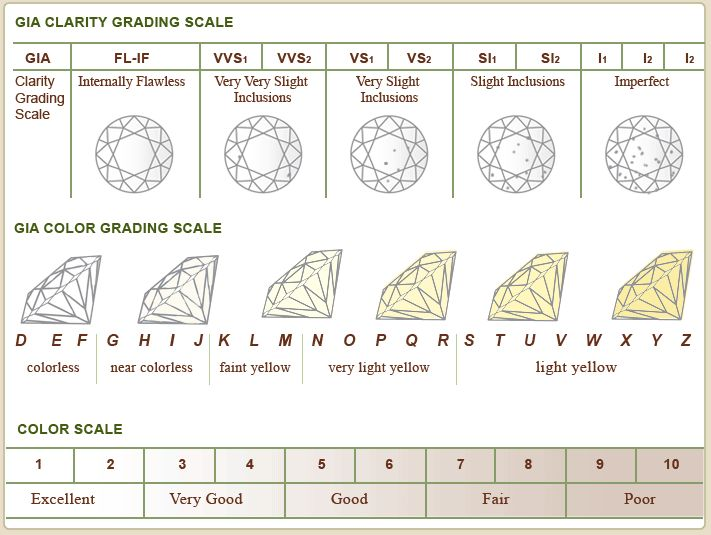

We will change the objects with respect to the rating of the properties and the start the analysis.

Cut:
1. Ideal
2. Premium
3. Very Good
4. Good
5. Fair

Color:
1. D
2. E
3. F
4. G
5. H
6. I
7. J

Clarity:
1. IF
2. VVS1
3. VVS2
4. VS1
5. VS2
6. SI1
7. SI2
8. I1


In [11]:
categorical_data = trainer.columns[trainer.dtypes=="object"]
numerical_data = trainer.columns[trainer.dtypes!="object"]

In [12]:
trainer[categorical_data].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
trainer[numerical_data].describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [14]:
trainer['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [15]:
trainer['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [16]:
trainer['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [17]:
trainer = trainer.drop(labels=['id'], axis=1)

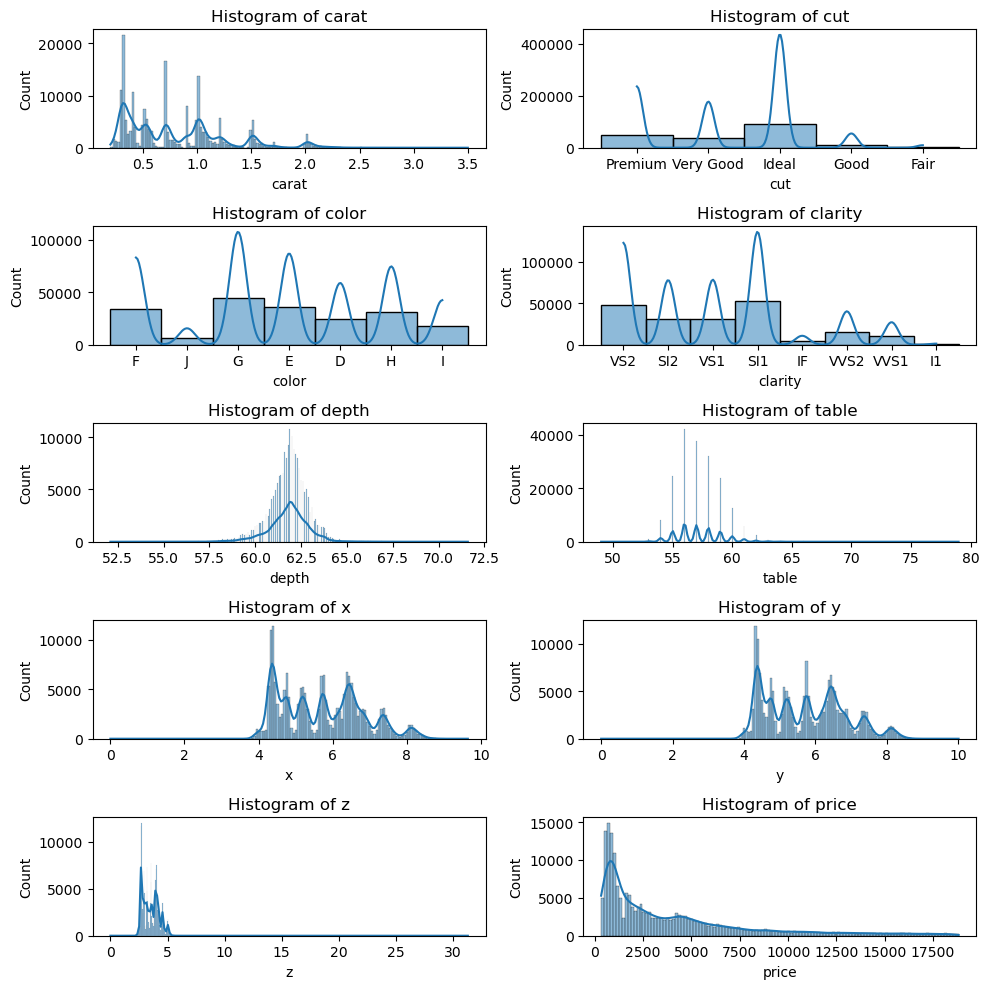

In [18]:
fig, axs = plt.subplots(nrows = int(len(trainer.columns)/2), ncols = 2, figsize=(10,10))
axs = axs.flatten()
for i, cols in enumerate(trainer.columns):
    sn.histplot(data=trainer, x=cols, kde=True, ax=axs[i])
    axs[i].set_title(f"Histogram of {cols}")
    
plt.tight_layout()
plt.show()

In [19]:
trainer = pd.read_csv("data/train.csv")
cut_encode = {"Ideal":1, "Premium":2, "Very Good":3, "Good":4, "Fair":5}
clarity_encode = {"IF":1, "VVS1":2, "VVS2":3, "VS1":4, "VS2":5, "SI1":6, "SI2":7, "I1":8}
color_encode  = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}

trainer["cut"] = trainer["cut"].map(cut_encode)
trainer["clarity"] = trainer["clarity"].map(clarity_encode)
trainer["color"] = trainer["color"].map(color_encode)
trainer.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,2,3,5,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,7,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,1,4,4,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,1,4,4,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,2,4,5,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
trainer

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,2,3,5,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,7,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,1,4,4,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,1,4,4,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,2,4,5,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,1,1,3,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,2,4,3,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,3,3,6,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,3,1,6,62.9,55.0,4.45,4.49,2.81,681


In [24]:
trainer = trainer.drop(labels="id", axis=1)

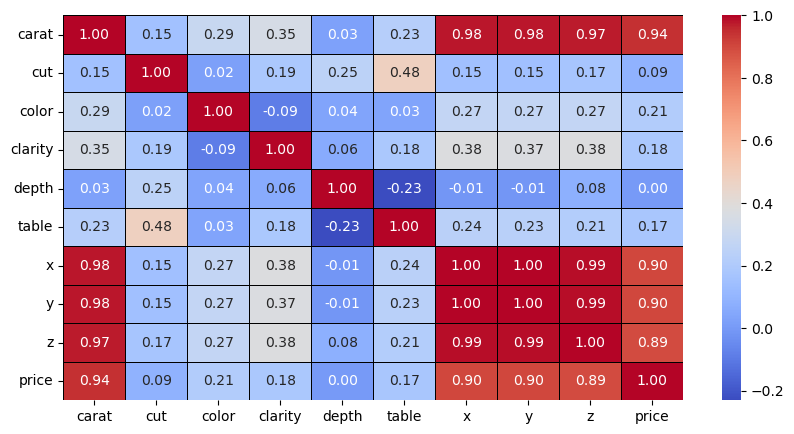

In [25]:
corr = trainer.corr()
plt.figure(figsize=(10,5))
sn.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linecolor='k', linewidths=0.5)
plt.show()

In [26]:
trainer.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [27]:
trainer.head(4)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,2,3,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,7,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,4,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,4,4,61.6,56.0,4.38,4.41,2.71,666


In [28]:
trainer.to_csv("./data/pre_processed_training_data.csv", index=False)

Now the preprocessing of the training data is done.